In [1]:
# !pip install missingno

In [2]:
import pandas as pd
import numpy as np 
import scipy as sp
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%precision 3

'%.3f'

In [3]:
train = pd.read_csv('C:/Users/KIHyuk/Desktop/dacon_data/Data_병원개폐업/train.csv')
test = pd.read_csv('C:/Users/KIHyuk/Desktop/dacon_data/Data_병원개폐업/test.csv')

In [4]:
train

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,9.423771e+09,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN


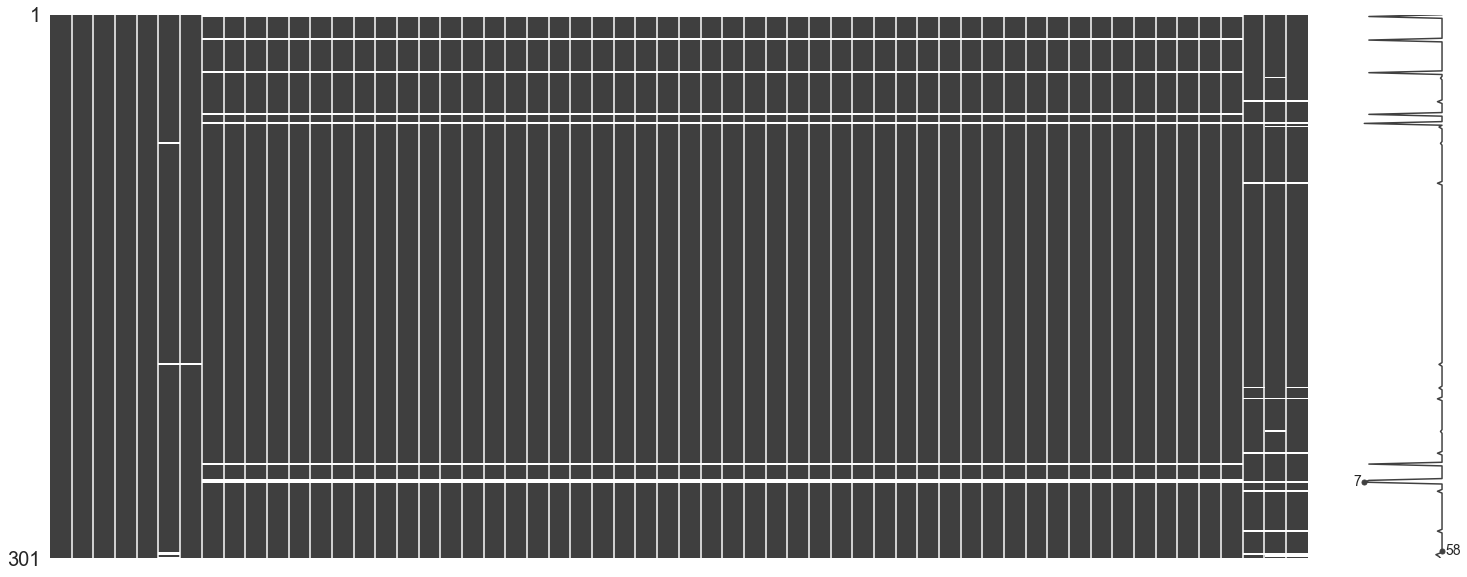

In [5]:
msno.matrix(train)

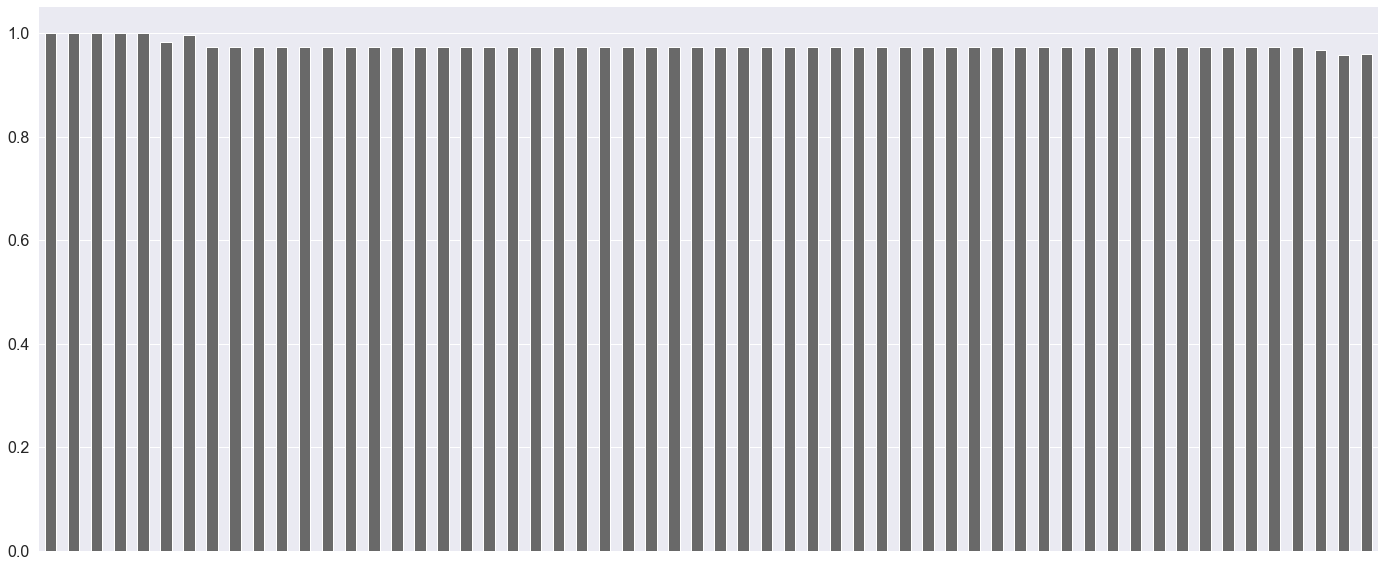

In [6]:
msno.bar(train)

In [7]:
# 결측치 제거
train.loc[train.isnull().sum(1) > 0,:].index

Int64Index([  1,  14,  32,  35,  48,  55,  60,  62,  71,  93, 193, 206, 212,
            230, 242, 248, 257, 258, 263, 285, 297, 298, 299, 300],
           dtype='int64')

In [8]:
train_copy = train.dropna()

In [9]:
# 클래스 비율 확인

train_open = train_copy.query("OC == 'open'")
train_close = train_copy.query("OC == ' close'")

print("전체 %d개의 병원 데이터 중 open :%d개, close : %d개" %(len(train_copy),len(train_open),len(train_close)))


전체 277개의 병원 데이터 중 open :270개, close : 7개


In [10]:
# 파생변수 추가

i=0
def cal_year(x): # 지속년수
    global i
    i += 1
    result = 2017 - int(str(train.iloc[:,4].values[i-1])[:4])
    return result

train_copy['지속년수'] = train_copy['openDate'].apply(cal_year)


def cal_employee(x): # 직원증감
    result = x[1] - x[0]
    return result

train_copy['직원증감'] = train_copy[['employee1','employee2']].apply(cal_employee,axis=1)


# train_copy['매출액_증감액'] = train_copy['revenue1'] - train_copy['revenue2']
# train_copy['매출원가_증감액'] = train_copy['salescost1'] - train_copy['salescost2']
# train_copy['판매비관리비_증감액'] = train_copy['sga1'] - train_copy['sga2']
# train_copy['급여_증감액'] = train_copy['salary1'] - train_copy['salary2']
# train_copy['영업외수익_증감액'] = train_copy['noi1'] - train_copy['noi2']
# train_copy['영업외비용_증감액'] = train_copy['noe1'] - train_copy['noe2']
# train_copy['이자비용_증감액'] = train_copy['interest1'] - train_copy['interest2']
# train_copy['법인세비용_증감액'] = train_copy['ctax1'] - train_copy['ctax2']
# train_copy['당기순이익_증감액'] = train_copy['profit1'] - train_copy['profit2']
# train_copy['유동자산_증감액'] = train_copy['liquidAsset1'] - train_copy['liquidAsset2']
# train_copy['당좌자산_증감액'] = train_copy['quickAsset1'] - train_copy['quickAsset2']
# train_copy['미수금_증감액'] = train_copy['receivableS1'] - train_copy['receivableS2']
# train_copy['재고자산_증감액'] = train_copy['inventoryAsset1'] - train_copy['inventoryAsset2']
# train_copy['비유동자산_증감액'] = train_copy['nonCAsset1'] - train_copy['nonCAsset2']
# train_copy['유형자산_증감액'] = train_copy['tanAsset1'] - train_copy['tanAsset2']
# train_copy['기타비유동자산_증감액'] = train_copy['OnonCAsset1'] - train_copy['OnonCAsset2']
# train_copy['장기미수금_증감액'] = train_copy['receivableL1'] - train_copy['receivableL2']
# train_copy['부채총계_증감액'] = train_copy['debt1'] - train_copy['debt2']
# train_copy['유동부채_증감액'] = train_copy['liquidLiabilities1'] - train_copy['liquidLiabilities2']
# train_copy['단기차입금_증감액'] = train_copy['shortLoan1'] - train_copy['shortLoan2']
# train_copy['비유동부채_증감액'] = train_copy['NCLiabilities1'] - train_copy['NCLiabilities2']
# train_copy['장기차입금_증감액'] = train_copy['longLoan1'] - train_copy['longLoan2']
# train_copy['순자산총계_증감액'] = train_copy['netAsset1'] - train_copy['netAsset2']
# train_copy['이익잉여금_증감액'] = train_copy['surplus1'] - train_copy['surplus2']

In [11]:
# 1차 변수제거

# inst_id, oepnDate 제거
train_copy = train_copy.drop(['inst_id','openDate','employee1','employee2','sgg'],axis=1)

#
# train_copy = train_copy.drop(['revenue1', 'salescost1', 'sga1',
#        'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1',
#        'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1',
#        'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1',
#        'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1',
#        'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2',
#        'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2',
#        'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2',
#        'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2',
#        'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2',
#        'netAsset2', 'surplus2'],axis=1)

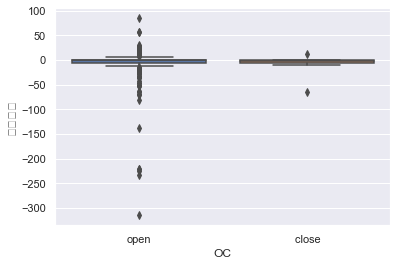

In [12]:
sns.boxplot(x='OC', y='직원증감', data=train_copy[['OC','직원증감']])

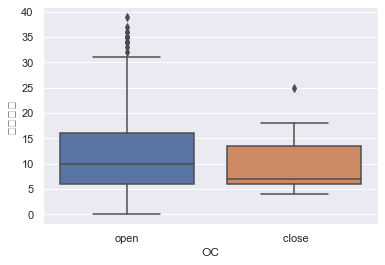

In [13]:
sns.boxplot(x='OC', y='지속년수', data=train_copy[['OC','지속년수']])

In [14]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('OC ~ salary1 + noi1 + noe1 + ctax1 + profit1 + \
       receivableS1 + inventoryAsset1 + OnonCAsset1 + receivableL1 + \
       shortLoan1 + longLoan1 + salescost2 + \
       noi2 + noe2 + interest2 + ctax2 + profit2 + quickAsset2 + receivableS2 + \
       OnonCAsset2 + receivableL2 + shortLoan2 + \
       longLoan2 + netAsset2 + surplus2', train_copy, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif.round(0).sort_values(by='VIF Factor',ascending=False)

,VIF Factor,features
20,9.0,OnonCAsset2
8,9.0,OnonCAsset1
18,9.0,quickAsset2
4,9.0,ctax1
16,9.0,ctax2
14,8.0,noe2
3,7.0,noe1
17,6.0,profit2
11,6.0,longLoan1
10,5.0,shortLoan1


In [15]:
# # scaling
# # MinMax Scaler

# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import MinMaxScaler

# Robust_scaler = RobustScaler().fit_transform(train_copy[['bedCount', '지속년수', '직원증감',
#        '매출액_증감액', '매출원가_증감액', '판매비관리비_증감액', '급여_증감액', '영업외수익_증감액', '영업외비용_증감액',
#        '이자비용_증감액', '법인세비용_증감액', '당기순이익_증감액', '유동자산_증감액', '당좌자산_증감액', '미수금_증감액',
#        '재고자산_증감액', '비유동자산_증감액', '유형자산_증감액', '기타비유동자산_증감액', '장기미수금_증감액',
#        '부채총계_증감액', '유동부채_증감액', '단기차입금_증감액', '비유동부채_증감액', '장기차입금_증감액',
#        '순자산총계_증감액', '이익잉여금_증감액']])

# MinMax_scaler = MinMaxScaler().fit_transform(train_copy[['bedCount', '지속년수', '직원증감',
#        '매출액_증감액', '매출원가_증감액', '판매비관리비_증감액', '급여_증감액', '영업외수익_증감액', '영업외비용_증감액',
#        '이자비용_증감액', '법인세비용_증감액', '당기순이익_증감액', '유동자산_증감액', '당좌자산_증감액', '미수금_증감액',
#        '재고자산_증감액', '비유동자산_증감액', '유형자산_증감액', '기타비유동자산_증감액', '장기미수금_증감액',
#        '부채총계_증감액', '유동부채_증감액', '단기차입금_증감액', '비유동부채_증감액', '장기차입금_증감액',
#        '순자산총계_증감액', '이익잉여금_증감액']])

# train_res = train_copy.copy()

# train_res[['bedCount', '지속년수', '직원증감',
#        '매출액_증감액', '매출원가_증감액', '판매비관리비_증감액', '급여_증감액', '영업외수익_증감액', '영업외비용_증감액',
#        '이자비용_증감액', '법인세비용_증감액', '당기순이익_증감액', '유동자산_증감액', '당좌자산_증감액', '미수금_증감액',
#        '재고자산_증감액', '비유동자산_증감액', '유형자산_증감액', '기타비유동자산_증감액', '장기미수금_증감액',
#        '부채총계_증감액', '유동부채_증감액', '단기차입금_증감액', '비유동부채_증감액', '장기차입금_증감액',
#        '순자산총계_증감액', '이익잉여금_증감액']] = Robust_scaler

In [38]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

Robust_scaler = MinMaxScaler().fit_transform(train_copy[['revenue1', 'salescost1', 'sga1',
       'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1',
       'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1',
       'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1',
       'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1',
       'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2',
       'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2',
       'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2',
       'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2',
       'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2',
       'netAsset2', 'surplus2', 'bedCount', '지속년수', '직원증감']])

train_res = train_copy.copy()

train_res[['revenue1', 'salescost1', 'sga1',
       'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1',
       'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1',
       'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1',
       'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1',
       'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2',
       'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2',
       'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2',
       'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2',
       'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2',
       'netAsset2', 'surplus2', 'bedCount', '지속년수', '직원증감']] = Robust_scaler

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_res['sido'] = label_encoder.fit_transform(train_res['sido'])
train_res['ownerChange'] = label_encoder.fit_transform(train_res['ownerChange'])
train_res['instkind'] = label_encoder.fit_transform(train_res['instkind'])
train_res['OC'] = label_encoder.fit_transform(train_res['OC'])

In [40]:
# SMOTE
# 단순 반복이 아닌 KNN을 통해 주변 인공 데이터를 생성하는 SMOTE(Synthetic Minority Oversampling TEchnique)

from sklearn.neighbors import NearestNeighbors

def load_data_with_SMOTE(df):
    rawdata = df
    size = 200
    small = rawdata[rawdata['OC'] == 0] # 소수 클래스
    n_sample = small.shape[0] # 소수 클래스 개수
    idx = np.random.randint(0, n_sample, size) # 0~49범위의 랜덤수 150개 생성 
    X = small.iloc[idx, range(1,55)].values # * 랜덤수150개에 해당하는 1~5 col 정보 추출
    y = small.iloc[idx, 0].values # 랜덤수150개에 해당하는 클래스 추출 'B'
    
    # kneighbors(X) => 두가지 return (distance,index)
    knn = NearestNeighbors(n_neighbors=2) # 2개의 최근접 이웃을 찾겠다
    knn.fit(X) # 2d array input
    _d, i = knn.kneighbors(X) # input 데이터와 최근접 이웃 2가지의 index(학습데이터)와 input데이터와 이웃데이터 사이의 거리를 반환
    idx2 = i[:, 1] # train과 input이 같으므로 최근접 이웃 2가지의 return 중 첫번째는 무조건 "같은"데이터가나옴. 같은데이터 제외
    diff = X - X[idx2]
    X = X + np.random.random(54) * diff # 최근접 이웃과 비슷한 데이터로 생성
    B = np.concatenate([np.transpose(y[np.newaxis]), X], axis=1)
    B = pd.DataFrame(B)

    n_sample = rawdata[rawdata['OC'] == 1].shape[0]
    idx = np.random.randint(0, n_sample, size)
    L = rawdata[rawdata['OC'] == 1].iloc[idx]

    df = np.concatenate([B.values, L.values])

#     le = LabelEncoder()
#     X = d[:, 1:31]
#     y = le.fit_transform(d[:, 0])
    return df

In [41]:
df = load_data_with_SMOTE(train_res)
train_res = pd.DataFrame(df,columns=train_res.columns)

In [20]:
# model_1 = smf.glm(
#     formula = "OC ~ bedCount+지속년수+ 직원증감 + 매출액_증감액 + 매출원가_증감액 + 판매비관리비_증감액 + 급여_증감액 + \
#        영업외수익_증감액 + 영업외비용_증감액 + 이자비용_증감액 + 법인세비용_증감액 + 당기순이익_증감액 + \
#        유동자산_증감액 + 당좌자산_증감액 + 미수금_증감액 + 재고자산_증감액 + 비유동자산_증감액 + 유형자산_증감액 + \
#        기타비유동자산_증감액 + 장기미수금_증감액 + 부채총계_증감액 + 유동부채_증감액 + 단기차입금_증감액 + 비유동부채_증감액 + \
#        + 장기차입금_증감액 + 순자산총계_증감액 + 이익잉여금_증감액",
#     data = train_res,
#     family = sm.families.Binomial()
# ).fit()    

In [21]:
# sido + bedCount + instkind + 지속년수 + 직원증감 + ownerChange

In [42]:
train_res

,OC,sido,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,ownerChange,지속년수,직원증감
0,0.0,8.0,0.000000,5.0,0.047436,0.008892,0.052304,0.041461,0.008350,0.035940,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.138809,0.039006,1.0,0.641026,0.763092
1,0.0,8.0,0.000000,5.0,0.047436,0.008892,0.052304,0.041461,0.008350,0.035940,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.138809,0.039006,1.0,0.641026,0.763092
2,0.0,14.0,0.000000,0.0,0.006043,0.000591,0.009827,0.008206,0.000009,0.002590,...,0.012175,0.004492,0.000000,0.014144,0.022371,0.150382,0.039006,0.0,0.230769,0.783042
3,0.0,0.0,0.230183,3.0,0.058579,0.000000,0.077267,0.068983,0.151739,0.083107,...,0.175728,0.146316,0.355240,0.095805,0.151170,0.140532,0.039006,1.0,0.153846,0.785536
4,0.0,12.0,0.993902,4.0,0.111465,0.024083,0.119863,0.126404,0.031888,0.042970,...,0.168128,0.024579,0.000143,0.245086,0.226229,0.249492,0.039006,0.0,0.179487,0.625935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,7.0,0.172256,4.0,0.015634,0.000000,0.022785,0.020928,0.000902,0.000503,...,0.069575,0.010481,0.000000,0.101010,0.121053,0.110388,0.039006,0.0,0.128205,0.807980
396,1.0,6.0,0.280488,3.0,0.087942,0.000000,0.129544,0.126231,0.006175,0.008105,...,0.056756,0.040073,0.000000,0.040493,0.057123,0.171840,0.035920,1.0,0.153846,0.743142
397,1.0,9.0,0.298780,2.0,0.324792,0.000000,0.462680,0.381987,0.012287,0.163369,...,0.604459,0.439216,1.000000,0.414726,0.433274,0.138847,0.165576,1.0,0.435897,0.763092
398,1.0,9.0,0.298780,2.0,0.324792,0.000000,0.462680,0.381987,0.012287,0.163369,...,0.604459,0.439216,1.000000,0.414726,0.433274,0.138847,0.165576,1.0,0.435897,0.763092


In [49]:
model_2 = smf.glm(
    formula = "OC ~  salary1 + noi1 + noe1 + ctax1 + profit1 + \
       receivableS1 + inventoryAsset1 + OnonCAsset1 + receivableL1 + \
       shortLoan1",
    data = train_res,
    family = sm.families.Binomial()
).fit()

In [50]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     OC   No. Observations:                  400
Model:                            GLM   Df Residuals:                      390
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -221.23
Date:                Fri, 31 Jan 2020   Deviance:                       442.47
Time:                        01:11:35   Pearson chi2:                     370.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.8523      0.751      1.135      0.256      -0.619       2.324
salary1             4.1159      3.138      1.312      0.190      -2.035      10.266
noi1               -6.4337      4.570     -1.408      0.159     -15.391       2.523
noe1                4.0551      4.668      0.869      0.385      -5.095      13.205
ctax1              28.8268     11.700      2.464      0.014       5.896      51.757
profit1            -3.6372      1.913     -1.902      0.057      -7.386       0.112
receivableS1       -5.3554      2.137     -2.506      0.012      -9.544      -1.167
inventoryAsset1   -12.6991      4.857     -2.615      0.009     -22.218      -3.180
OnonCAsset1        16.3063      6.723      2.426      0.015       3.130      29.483
receivableL1             0          0        nan        nan           0           0
shortLoan1         22.5718      5.145      4.387      0.000      12.487      32.656
===================================================================================
"""

In [48]:
model_2.aic

nan